# Bank Churn Prediction

### Objective:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 

### Data Dictionary:

    RowNumber: Row number.
    CustomerId: Unique identification key for different customers.
    Surname: Surname of the customer
    Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
    Geography: The country to which the customer belongs.
    Gender: The gender of the customer.
    Age: Age of the customer.
    Tenure: The period of time a customer has been associated with the bank.
    Balance: The account balance (the amount of money deposited in the bank account) of the customer.
    NumOfProducts: How many accounts, bank account affiliated products the person has.
    HasCrCard: Does the customer have a credit card through the bank?
    IsActiveMember: Subjective, but for the concept
    EstimatedSalary: Estimated salary of the customer.
    Exited: Did they leave the bank after all?


## 1. Read the dataset

In [235]:
#importing neccessarz libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import math
%matplotlib inline

from sklearn import metrics

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [236]:
import warnings
warnings.filterwarnings("ignore")

In [237]:
df=pd.read_csv('bank.csv')

In [238]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [239]:
df.shape

(10000, 14)

Data is organised in 14 columns (variables) and 10000 rows (cases/datapoints). 
Next command provides info about dtypes.

In [240]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Most of the vairbales are of numerical type - 64bit integer or 64 bit float. Some, however are of object type like Surname, Geopgraphy and Gender. Surname is most probably irrelevant, however, Geography and Gender might be useful, so those should be one hot encoded and then original columns droped.

In [241]:
df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

Some basic statisitcs on columns could be seen above. E.g. RowNumber, as expected have min value of 1 and max value of 10000. THis varibale is not useful for model, since it provides no iformation about customer. THe same applies to CustomerID. CreditScore recorded no extreme possible values predicted for such metric (e.g.300 or 900), and looks like a normal distribution taking into account mean, median and 25 and 75 percentile values. Age also looks like having normal distribution where mean and median values are close. Min age is 18 and max 92 years. Similar conclusion might be drawn for Tenure, while Balance shows rigth skewness, or in other words, leakage of values to positive side. There is great difference between median and mean values for that variable. NumberOfProducts also indicate right skewness, however, smaller compared to Balance. The opposite shows HasCrCard, where median is slightly above mean. Left skewness is also indicated in IsActiveMember, where all values falls in the range from 0 to 1. Suprisingly, EsitmatedSalary shows no indication of right skewness, what is usually expected for such variable. There is strange value of 11.58 for min EstimatedSalary, so attention shoud be given to such low values for this variable. Finally, Exited varibale is target variable, so, as expected, it has to possible values: 1 or 0. As one can see, it is highly right skewed indicating high imbalance in this varibale, perfect candidate for DNN. 

It is worth noting that all of the above numerical attributes shows no missing values. There are 10000 records for each one of them.

The code below changes object type of data to categorical.

In [242]:
#loop through columns of df to change dtype of objects to categorical
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=pd.Categorical(df[i])

In [243]:
df.dtypes

RowNumber             int64
CustomerId            int64
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [244]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [245]:
#checking the number of values for each unique value of Geography column
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Most of the customers are from France, the rest being split equally between Germany and Spain.

In [246]:
#checking the number of values for each unique value of Gender column
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

There is slight imbalance of data between genders, as shown above.

In [247]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Target variable is imbalanced, however, not as much as expected at the beginning of dataset analysis.

#### Onehot encoding of categorical variables

We need to create dummy variables from categorical ones - 'Gender' and 'Geography'

In [248]:
#generating only one additional variable
#df['Gender']=df['Gender'].map(lambda x: {'Male':1, 'Female':2}.get(x))

In [249]:
#df['Geography']=df['Geography'].map(lambda x: {'France': 1, 'Germany':2, 'Spain':3}.get(x))

In [250]:
#creating dummy variables out of Gender variable
df=pd.get_dummies(df, prefix='Gender', columns=['Gender'])

#creating dummy variables out of Geography variable
df=pd.get_dummies(df, prefix='Geography', columns=['Geography'])

In [251]:
df.head()

RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Gender_Female  Gender_Male  Geography_France  Geography_Germany  \
0              1            0                 1                  0   
1              1            0                 0                  0   
2              1            0                 1                  0   
3              1            0                 1                  0   
4              1            0                 0                  0   

   Geography_Spain  
0                0  
1                1  
2                0  
3                0  
4                1

Pandas get_dummies function generated 2 new dummy variables for Gender and 3 for Geography. In the next step, we may remove one with Gender prefix as well as one with Geography prefix, since such info is redundant (e.g. if one is female, it means it is not male, hence Gender_Male=0).  

In [252]:
#checking datatypes again
df.dtypes

RowNumber               int64
CustomerId              int64
Surname              category
CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Gender_Female           uint8
Gender_Male             uint8
Geography_France        uint8
Geography_Germany       uint8
Geography_Spain         uint8
dtype: object

We can see that new variables are of unsigned 8bit integer dataype.

#### Duplicates

In [253]:
df[df.duplicated()==True].shape


(0, 17)

There are no duplicated rows indicated in given dataset

#### Outliers analysis

Even though Balance and NumOfProducts indicates right skewness of their distributions, and, hence, outliers are expected on right side of data distributions, varibales that will be taken in this part of dataset analysis will be choosen based on difference between upper boundary for outliers and max value or lower boundary and min value.

Q3+1.5*IQR method will be used for this analysis because indications for outliers are gained from mean-median comparison at the beginning of this project.

In [254]:
IQR=df.quantile(.75)-df.quantile(.25)
Q1=df.quantile(.25)
Q3=df.quantile(.75)
upper_boundary=Q3+1.5*IQR
lower_boundary=Q1-1.5*IQR

In [255]:
##calculating the difference between lower boundary for outliers and min values in each variable to idenfy those varibales with outliers
lower_boundary-df.describe().T['min']

RowNumber             -4999.50000
CustomerId          -124231.00000
CreditScore              33.00000
Age                      -4.00000
Tenure                   -3.00000
Balance             -191466.36000
NumOfProducts            -1.50000
HasCrCard                -1.50000
IsActiveMember           -1.50000
EstimatedSalary      -96588.67625
Exited                    0.00000
Gender_Female            -1.50000
Gender_Male              -1.50000
Geography_France         -1.50000
Geography_Germany        -1.50000
Geography_Spain           0.00000
dtype: float64

Only CreditScore indicate presence of outliers in the region Q1-1.5*IQR

In [256]:
#calculating the difference between upper boundary for outliers and max values in each variable to idenfy those varibales with outliers
upper_boundary-df.describe().T['max']

RowNumber              4999.50000
CustomerId           124602.00000
CreditScore              69.00000
Age                     -30.00000
Tenure                    3.00000
Balance               68212.51000
NumOfProducts            -0.50000
HasCrCard                 1.50000
IsActiveMember            1.50000
EstimatedSalary       96974.97375
Exited                   -1.00000
Gender_Female             1.50000
Gender_Male               1.50000
Geography_France          1.50000
Geography_Germany         1.50000
Geography_Spain          -1.00000
dtype: float64

As seen above, only 2 variables indicate outliers in the region higher then Q3+1.5*IQR - Age and NumOfProducts. Exited and Geography_Spain are basically categorical, so it could be considered only from data imabalance perspective.

In [257]:
IQR.drop(['RowNumber','CustomerId','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary','Exited','Gender_Female','Gender_Male','Geography_France','Geography_Germany','Geography_Spain'], inplace=True)

In [258]:
IQR

CreditScore      134.0
Age               12.0
NumOfProducts      1.0
dtype: float64

In [259]:
#generating a dict of variables where the sub-dataframe 
#(selected based on outliers of that particular variable) is stored as value
outliers={}
for i in IQR.index:
    outliers["{0}".format(i)]=df[(df[i]>Q3[i]+1.5*IQR[i])|(df[i]<Q1[i]-1.5*IQR[i])]

In [260]:
outliers['CreditScore']['CreditScore'].count()

15

In [261]:
outliers['Age']['Age'].count()

359

In [262]:
outliers['NumOfProducts']['NumOfProducts'].count()

60

There are 
- 0.15% outliers in CreditScore;
- 3.59% outliers in Age;
- 0.6% outliers in NumOfProducts.


##### With following lines, the ratio of exited is calculated for groups of outliers in the Age variable and group that do not fall under otulier category 

In [263]:
#for outliers group in Age - calculation of ratio between Exited=0 to Exited=1
100*(df[df['Age']>=min(outliers['Age']['Age'])]['Exited'].value_counts()/df[df['Age']>=min(outliers['Age']['Age'])]['Exited'].value_counts().sum())

0    79.665738
1    20.334262
Name: Exited, dtype: float64

In [264]:
#for not outliers group in Age - calculation of ratio between Exited=0 to Exited=1
100*(df[df['Age']<min(outliers['Age']['Age'])]['Exited'].value_counts()/df[df['Age']<min(outliers['Age']['Age'])]['Exited'].value_counts().sum())

0    79.628669
1    20.371331
Name: Exited, dtype: float64

For both groups - outlier group and not outlier group there is same ratio of those who exited and those who did not - around 80% to 20%.

Taking this into account, we probably might treat those outliers without impacting perfomance of the model.

##### CreditScore outliers in relation to Exited variable

In [265]:
#for not outliers group in CreditScore - calculation of ratio between Exited=0 to Exited=1
100*(df[df['CreditScore']>max(outliers['CreditScore']['CreditScore'])]['Exited'].value_counts()/df[df['CreditScore']>max(outliers['CreditScore']['CreditScore'])]['Exited'].value_counts().sum())

0    79.749624
1    20.250376
Name: Exited, dtype: float64

In [266]:
#for outliers group in CreditScore - calculation of ratio between Exited=0 to Exited=1
100*(df[df['CreditScore']<=max(outliers['CreditScore']['CreditScore'])]['Exited'].value_counts()/df[df['CreditScore']<=max(outliers['CreditScore']['CreditScore'])]['Exited'].value_counts().sum())

1    100.0
Name: Exited, dtype: float64

In [267]:
#ratio of those Exited=1 comming from outliers in CreditScore and total number of Exited=1
100*(df[df['CreditScore']<=max(outliers['CreditScore']['CreditScore'])]['Exited'].value_counts()/df[df['Exited']==1]['Exited'].count())

1    0.736377
Name: Exited, dtype: float64

The amount of outliers in CreditScore variable is not high, however, all cases that falls into that group has value of varibale Exited equals to 1 in comparison to rest of the datapoints where the ratio is 80-20. If those outliers are treated, it may have an impact on performance of model by losing critical information, however, when compared to total number of Exited=1, it is only 0.7363% of datapoints belonging to that group, so some outliers treatman might be applied here.

##### NumOfProducts outliers in relation to Exited variable

In [268]:
100*(df[df['NumOfProducts']>=min(outliers['NumOfProducts']['NumOfProducts'])]['Exited'].value_counts()/df[df['NumOfProducts']>=min(outliers['NumOfProducts']['NumOfProducts'])]['Exited'].value_counts().sum())

1    100.0
Name: Exited, dtype: float64

In [269]:
100*(df[df['NumOfProducts']<min(outliers['NumOfProducts']['NumOfProducts'])]['Exited'].value_counts()/df[df['NumOfProducts']<min(outliers['NumOfProducts']['NumOfProducts'])]['Exited'].value_counts().sum())

0    80.110664
1    19.889336
Name: Exited, dtype: float64

In [270]:
100*(df[df['NumOfProducts']>=min(outliers['NumOfProducts']['NumOfProducts'])]['Exited'].value_counts()/df[df['Exited']==1]['Exited'].count())

1    2.945508
Name: Exited, dtype: float64

Here we have similar result with regards to the outliers group where all of those datapoints are associated with Exited=1, however, in this case, there is significantly higher portion of such datapoints in total number of datapoints where Exited=1, compared to previous case (2.94% in comparison to 0.73%). In this case, different outliers treatman strategy might be useful - instead of changing outliers with mean value, we might change such values with Q3+1.5IQR value, so we'll create a cap at the higher end of datadistribution for this variable. we could consider such strategy as process of slight smoothing high varaince information (like a low pass filter). 

##### Final conclusion on outliers

All outliers shoule be treated, but two methods should be used depending on the analysis above:

- outliers in variables Age and CreditScore should be exchanged with mean value of those columns;
- outliers in variable NumOfProducts should be exchanged with Q3+1.5*IQR of that variable.

##### Treating outliers as indicated above

###### Applying median

In [271]:
#calculating median to be used instead of outliers in Age and CreditScore
Q2=df.quantile(.5)

In [272]:
#changing outliers in CreditScore with median for CreditScore
df['CreditScore']=df['CreditScore'].map(lambda x: Q2['CreditScore'] if (x<=max(outliers['CreditScore']['CreditScore'])) else x)

In [273]:
#changing outliers in Age with median for Age
df['Age']=df['Age'].map(lambda x: Q2['Age'] if x>=min(outliers['Age']['Age']) else x)

##### Applying Q3+1.5IQR

In [277]:
outliers['NumOfProducts']['NumOfProducts'].value_counts()

4    60
Name: NumOfProducts, dtype: int64

This variable has small number of possible values - only 4. It could be even considered as a candidate for dummy variables, where each number of products would be one variable. In this context, it is hard to establish outlier in classical sense - it could be treated as imbalanced data. As seen above, outliers are identified as values where number of products eqauls to 4, which is actual number of products customer is using. 

Graph below shows different distribution of customers who exited bank for different number of products. It could be seen that the behaviour of customers whith high number of products (3 and 4) are much more likely to have exited variable = 1. In fact for those with NumOfProducts=4 100% have Exited=1.  

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

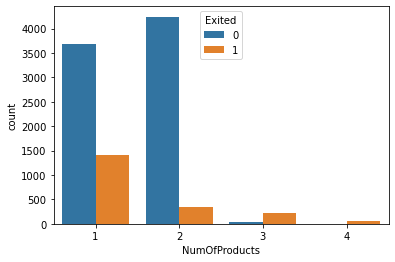

In [278]:
sns.countplot(df['NumOfProducts'], hue=df['Exited'])

In [280]:
#calculating percentage of those who exited grouped by NUmOfProducts
100*df.groupby('NumOfProducts')['Exited'].sum()/df['NumOfProducts'].value_counts()

NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
dtype: float64

Finally, it might be better to keep the varible in original form. If outliers elimination techique is applied, it may result in loss of data.

In [281]:
#chaning outliers in NumOfProducts with Q3+1.5*IQR
#df['NumOfProducts']=df['NumOfProducts'].map(lambda x: math.floor(upper_boundary['NumOfProducts']) if x>=min(outliers['NumOfProducts']['NumOfProducts']) else x)

## 2. Drop the columns which are unique for all users like IDs (5 points) 

Three columns have been identified as irrelevant for the development of model. Those are the ones which are specific to each customer (like row number and customer id), or being shared among small group of customers (like surname). Those columns should be droped from dataset. In addition, two columns formed througth the process of dummy_varibale creation, should be removed because those are redundant - Gender_Male and Geography_Spain. 

In [282]:
df.drop(columns=['RowNumber','CustomerId', 'Surname', 'Gender_Male', 'Geography_Spain'], inplace=True)

In [283]:
#checking if the columns have been droped by comparing the shape with previous one where there were 14 columns. 
df.shape

(10000, 12)

## 3. Perform bivariate analysis and give your insights from the same (5 points) 

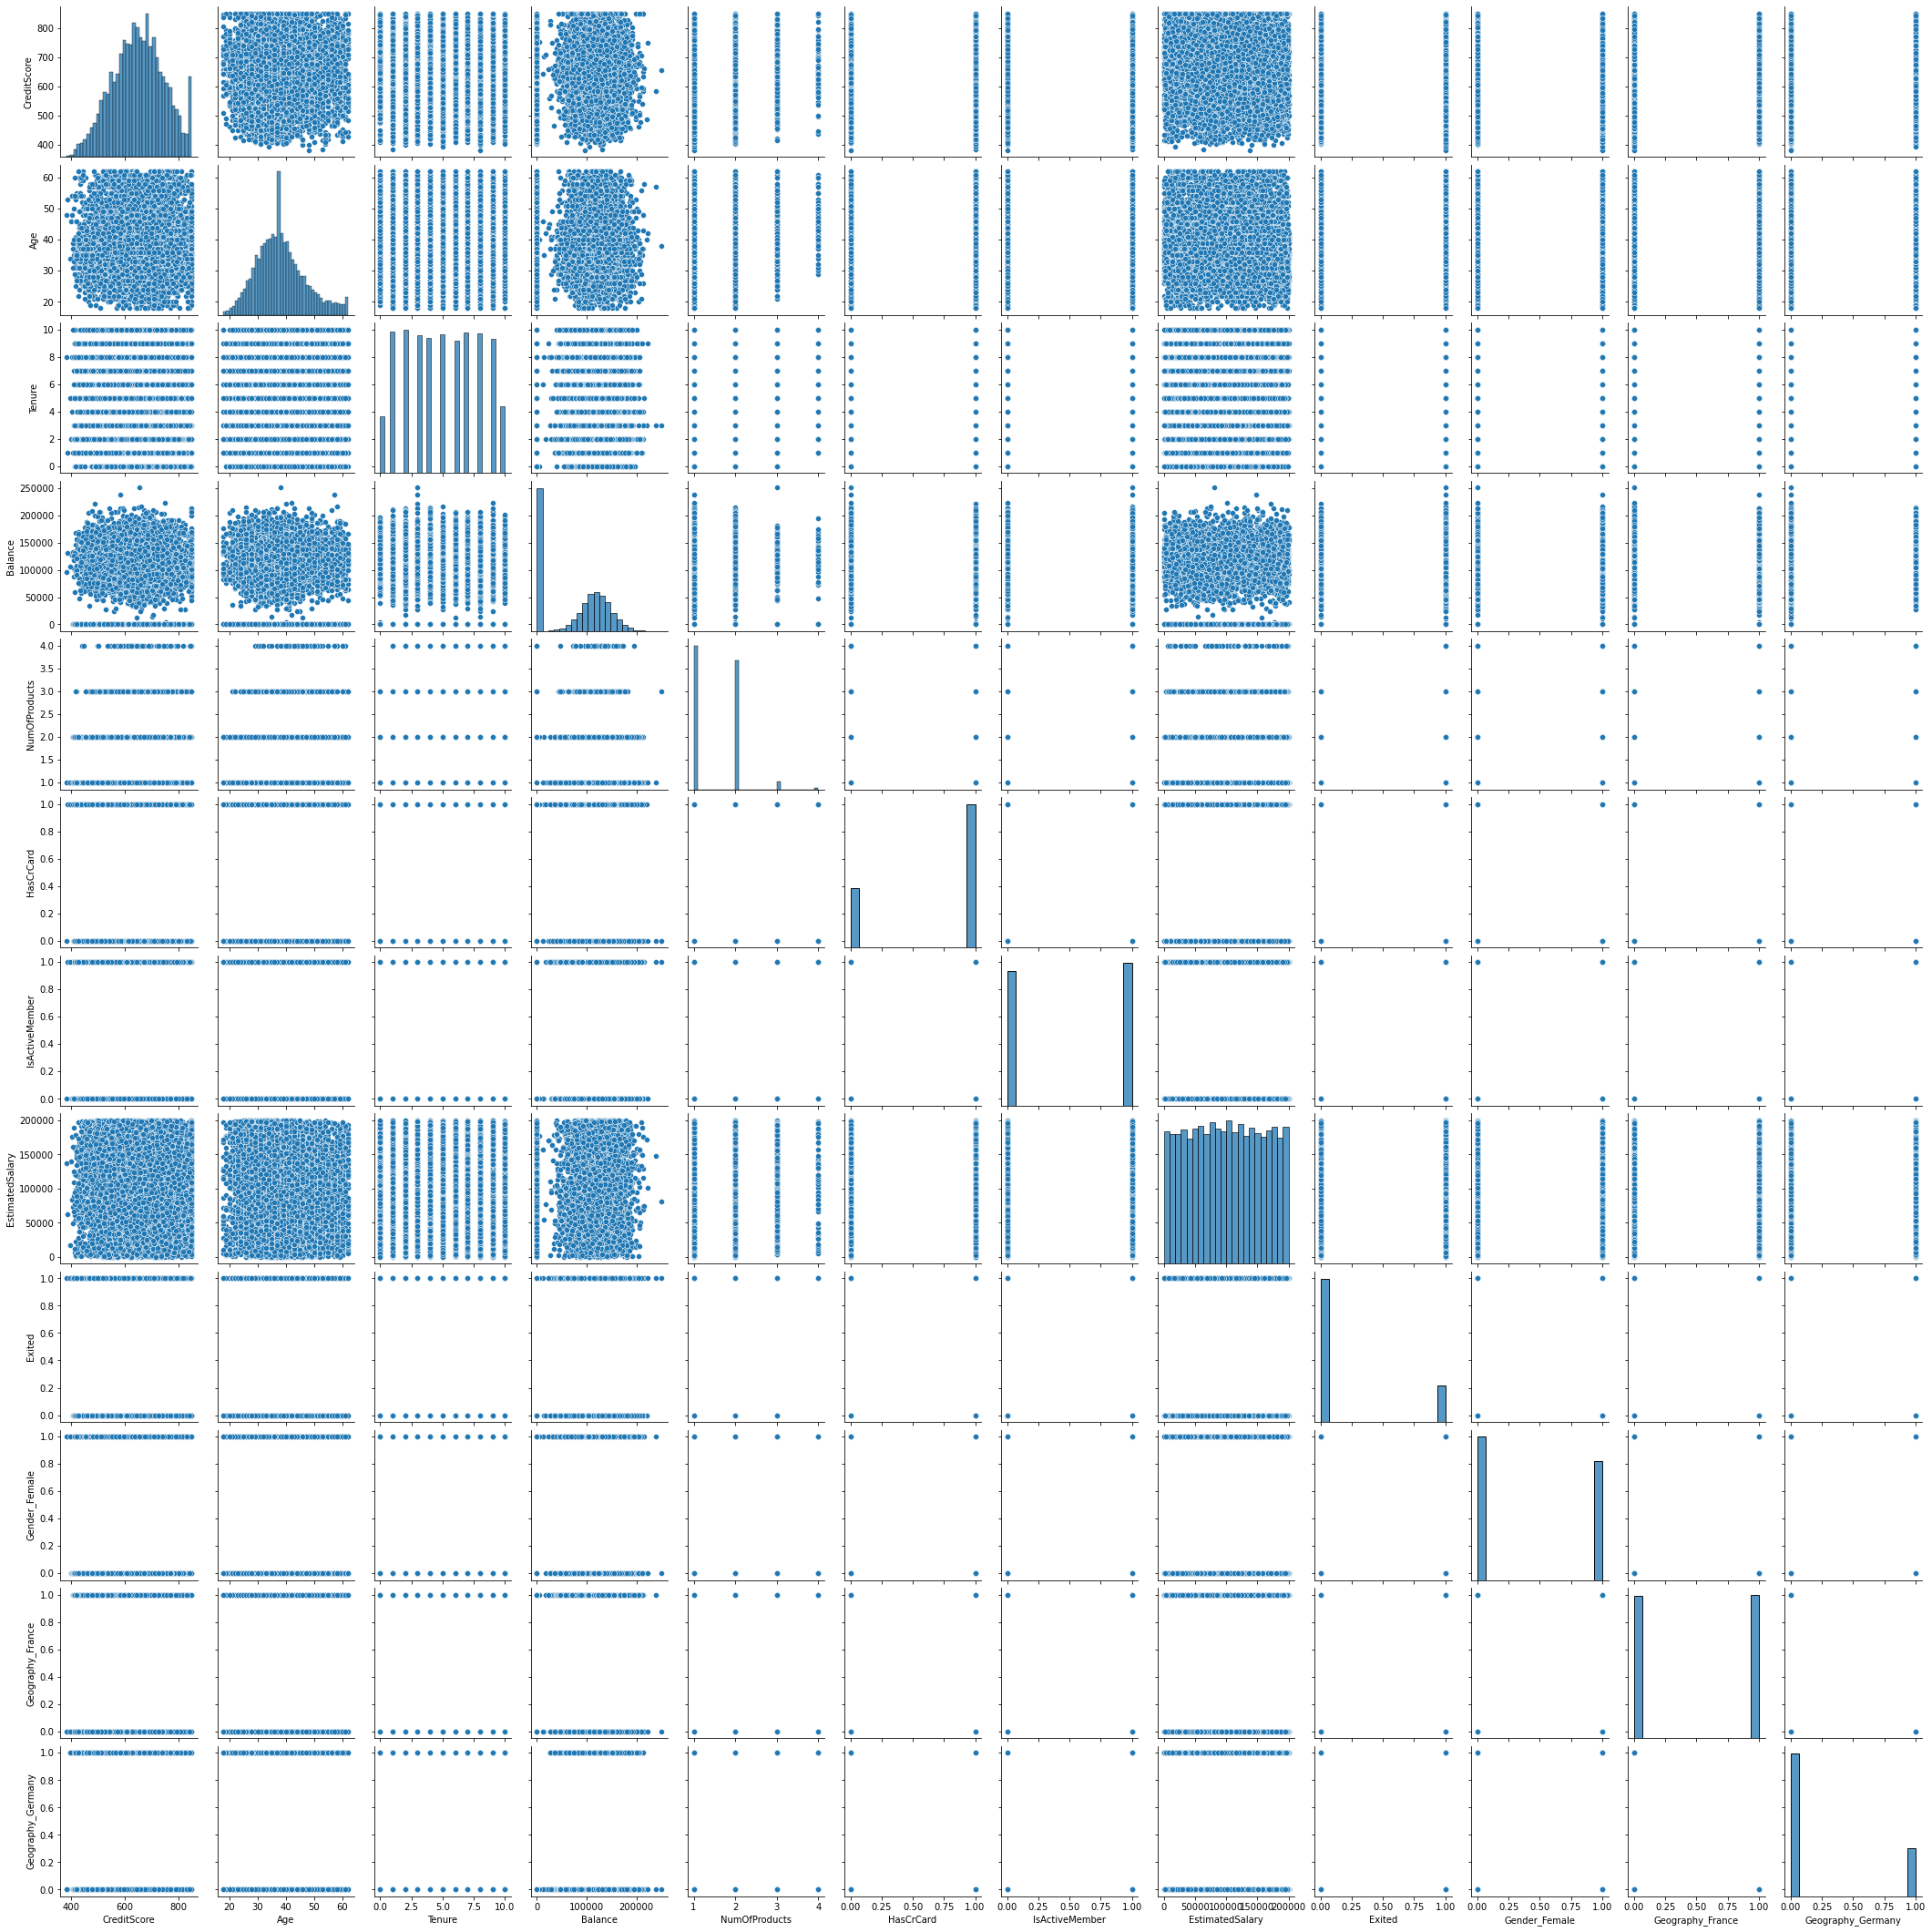

In [284]:
sns.pairplot(df)

From the above pairplot only Balance shows some relation to Exited variable where it seems like higher the balance, more likely customer exited bank. For other variables, escpeccially catrgorical ones, no conclusion may be given based on the graph above. 

Let's see in more details the relationship between target variable and categorical variables

In [285]:
cat_var=['IsActiveMember', 'HasCrCard', 'Gender_Female', 'Geography_France','Geography_Germany']

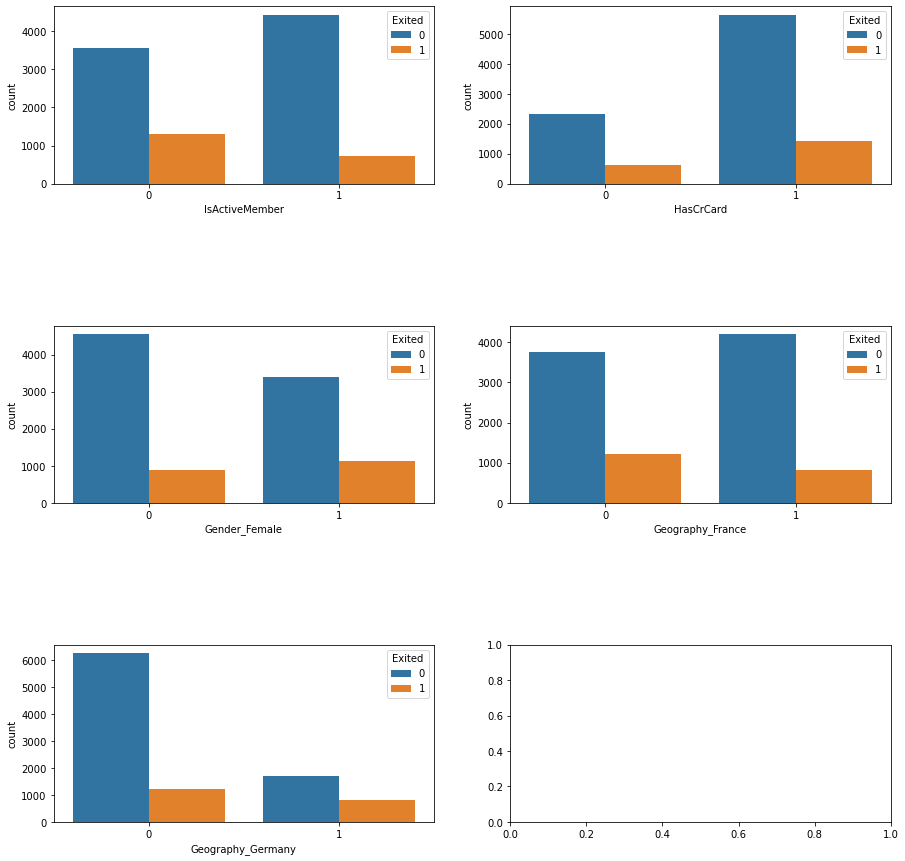

In [286]:
def get_xy(x, y):
    if y==1:
        return (x+1, 0)
    else:
        return (x, 1)


fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(15,15))
x=0
y=0
for i in cat_var:
    sns.countplot(df[i], ax=axs[x,y], hue=df['Exited'])
    #sns.jointplot(df[i], df['Exited'], ax=axs[x,y], hue=df['Exited'])
    x, y=get_xy(x, y)
    
plt.subplots_adjust(hspace=0.8, wspace=0.2)
plt.show()

From the plots above, it can be seen that not active members tends to exit bank more frequently. The portion of those who exited bank among not active members is higher compare to portion of those who have been tagged as active.

It is also noticable that females, even though represented by smaller amount of data points, present more than a half customers who exited bank.

It is impossible to depict relationship of datapoints in higher dimensional space with regards to target variable (higher than 3) it is worth plotting non categorical variables in such form, taking into account 2 such varibale with a hue defined by target variable. This kind of plot might give us idea if the data can be easilty lineray separated. 

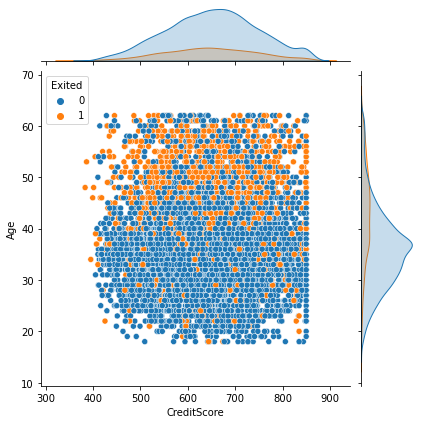

In [287]:
sns.jointplot(df['CreditScore'],df['Age'], hue=df['Exited'])

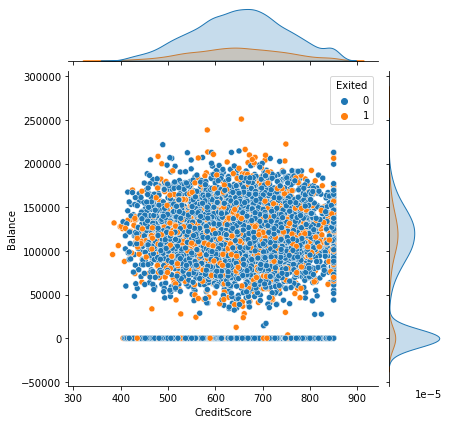

In [288]:
sns.jointplot(df['CreditScore'],df['Balance'], hue=df['Exited'])

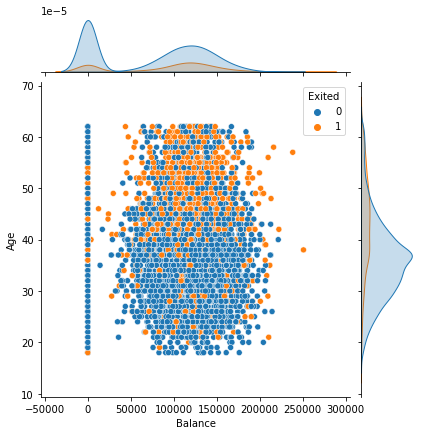

In [289]:
sns.jointplot(df['Balance'],df['Age'], hue=df['Exited'])

From the grapghs above, it can be concluded that different classes of target varibales are much harder to separate in Balance and Age plane compared to other two combination. 

In this context, estimated slary might be checked as well, however, since it is estimate, no such analysis will be provided here.

##  4. Distinguish the feature and target set and divide the data set into training and test sets (5 points) 

Target variable is Exited, hence all others are fetures that are inputs into model.

In [290]:
#assigning all columns but Exited to X variable
X=df.drop(columns=['Exited'])

In [291]:
#Assigning Exited column to y variable 
y=df['Exited']

Following code splits data (X and y variable) into two sets (training and test). Special attention is given to make same ratio of Exited to both sets by fixing stratify parameter to y variable.

In [292]:
#splitting the data into two sets, making sure the same ratio of Exited is preserved in both, trainning and test sets by setting stratify paramtere to be y variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7, stratify=y)

In [293]:
y_train=np.array(y_train)
y_test=np.array(y_test)

##  5. Normalize the train and test data (10points) 

To  normalize train and test data, MinMaxScaler will be used to transform all of the data to a range between 0 and 1. 

In [294]:
#initilaizing and fitting scaler object with X_train data
#scaler=MinMaxScaler().fit(X_train)

#transforming X_train data with scaler
X_train_scaled=MinMaxScaler().fit_transform(X_train)

To prevent leakage of train set into test sets, train and tests sets will be treated separatelly.

In [295]:
#fitting scaler object with X_test data
#scaler=MinMaxScaler().fit(X_test)

#transforming X_test data with scaler
X_test_scaled=MinMaxScaler().fit_transform(X_test)

All the data will be conerted to float64 since all computation will produce such dataype (because of multiplication of inputs with  weights)

In [296]:
X_train=X_train_scaled.astype('float64')
X_test=X_test_scaled.astype('float64')

#y_train=y_train.astype('float64')
#y_test=y_test.astype('float64')

##  6. Initialize & build the model. Identify the points of improvement and implement the same. (20) 

Initial model will be consisted of 1 hidden layer with 28 nodes and activation function relu. Initial weights shall be set to normal distribution random selection.

Since we have binary classification problem, only one node will be present in output layer, but with acctivation function sigmoid (because of classification problem)

Later, the second hidden layer might be used, and if gain is identified in performance, may be used for final model.

To get reproducible results, random seeds must be set. Keras does get its source of randomness from the NumPy random number generator, so this must be seeded regardless of usage of TensorFlow backend [1]. It also needs to be done at the beginning of the code, before tensorflow is used.

[1] https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

In [324]:
#setting random seed to make results repeatable
#first one is ranodm seed used by numpy
from numpy.random import seed
seed(7)

#setting random seed of tensorflow
tf.random.set_seed(7)

In [325]:
# Initialize the constructor
model = Sequential()

# Add an first hidden layer 
model.add(Dense(28, activation='relu', kernel_initializer='normal', dtype='float64'))

# second hidden layer

#model.add(Dense(14, activation='tanh', kernel_initializer='normal', dtype='float64'))


# Add an output layer with one neuron and no activation specified
model.add(Dense(1, activation = 'sigmoid', dtype='float64'))

Adam optimizer will be used with initial learning rate of 0.01. Learning rate provides opportunity to increase performance of a model. 

Binary crossentrpy will be used, since the problem is of binary classification form and for the metrics accuracy is used. It is of paramount imprtance to understand performance of the model based on accuracy. In this dataset, classes are distributed in 80-20% ratio, so, if accuracy score is ~80%, it means the model is performing very poorely, since it means all predictions are classified to belong to majority class.

In [326]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [328]:
#validation split is used to modify model without test set
history=model.fit(X_train, y_train, epochs=500, validation_split=0.2, batch_size=500, verbose=0) 

In the code above all the results of the fit process is stored in history object

Following graphs shows accuracy and loss on train and validation data through epochs. If the validation and test data graphs don't match, it may indicate overfit and underfit problems of the model - e.g. 

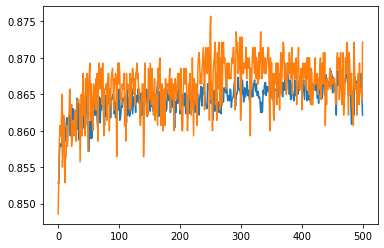

In [329]:
plt.plot(history.history.get('accuracy'))
plt.plot(history.history.get('val_accuracy'))

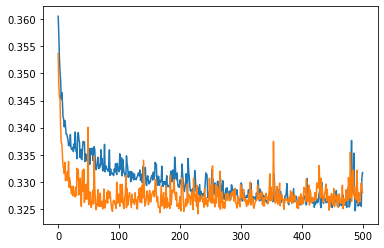

In [330]:
plt.plot(history.history.get('loss'))
plt.plot(history.history.get('val_loss'))
plt.show()

In [331]:
#final accuracy of train dataset
history.history.get('accuracy')[len(history.history.get('accuracy'))-1]

0.8621428608894348

In [332]:
#final accuracy of validation dataset
history.history.get('val_accuracy')[len(history.history.get('accuracy'))-1]

0.8721428513526917

In [333]:
#difference between accuracy of train and validation datasets
history.history.get('accuracy')[len(history.history.get('accuracy'))-1]-history.history.get('val_accuracy')[len(history.history.get('accuracy'))-1]

-0.009999990463256836

Graphs above have sharp peaks which indicate learning rate might be to large. This may prevent optimizer to aproach global minimum by skipping it (the resolution of learning rate is to low). 
In addition, better accuracy is achieved for validation set. Consequently, lower loss is also achieved for validation set as well. This indicate there is no overfit problem, however, it may indicate underfit problem. 

I next step, additional hidden layer is introduced to see if there is any benefit of adding it. All the other parameter remained the same so it both models could be compared.  

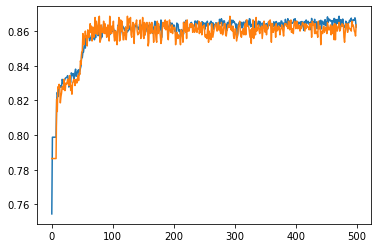

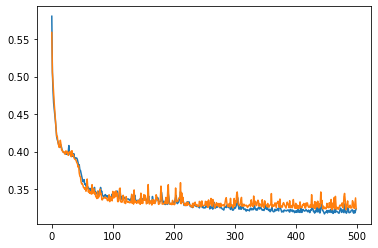

In [335]:
#model with second hidden layer

# Initialize the constructor
model = Sequential()

# Add an first hidden layer 
model.add(Dense(28, activation='relu', kernel_initializer='normal', dtype='float64'))

# second hidden layer

model.add(Dense(14, activation='relu', kernel_initializer='normal', dtype='float64'))

# Add an output layer with one neuron and no activation specified
model.add(Dense(1, activation = 'sigmoid', dtype='float64'))


optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=500, validation_split=0.2, batch_size=500, verbose=0) 


plt.plot(history.history.get('accuracy'))
plt.plot(history.history.get('val_accuracy'))
plt.show()
plt.plot(history.history.get('loss'))
plt.plot(history.history.get('val_loss'))
plt.show()

In [336]:
#final accuracy of train dataset
history.history.get('accuracy')[len(history.history.get('accuracy'))-1]

0.8623214364051819

In [337]:
#final accuracy of validation dataset
history.history.get('val_accuracy')[len(history.history.get('accuracy'))-1]

0.8635714054107666

As seen from above, just by adding second hidden layer, the trainning proces became smoother, however sharp peaks are still present. Model perform similar on training and validation test. It may be concluded that there is some benefit of second hidden layer.

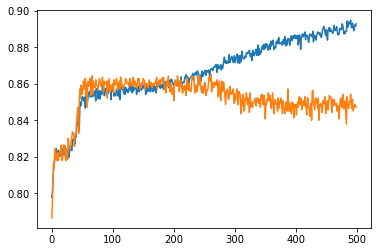

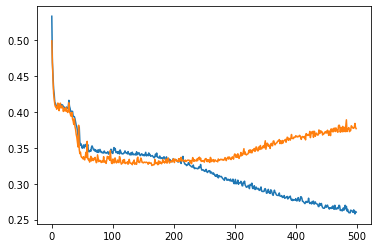

In [338]:
#model with different activation function in both hidden layers

model = Sequential()

# Add an first hidden layer 
model.add(Dense(28, activation='tanh', kernel_initializer='normal', dtype='float64'))

# second hidden layer

model.add(Dense(14, activation='tanh', kernel_initializer='normal', dtype='float64'))

# Add an output layer with one neuron and no activation specified
model.add(Dense(1, activation = 'sigmoid', dtype='float64'))


optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=500, validation_split=0.2, batch_size=500, verbose=0) 


plt.plot(history.history.get('accuracy'))
plt.plot(history.history.get('val_accuracy'))
plt.show()
plt.plot(history.history.get('loss'))
plt.plot(history.history.get('val_loss'))
plt.show()

When tanh activation function is applied to both hidden layers' nodes model becomes highly overfit, as seen from the graphs above. 

##### Finding better hyper parameter set
To achieve better performance, a grid search of hyperparameter space is done in a code below. There are several parameters used to perform gridsearch indicated in param_grid dictionary, the most . The process is done using cross validation technique, where 5 kfolds datasets are being used (cv=5).

Keras models can be used in scikit-learn by wrapping them with the KerasClassifier or KerasRegressor class.
To use these wrappers a function that creates and returns Keras sequential model must be made, then this function is passed to the build_fn argument when the KerasClassifier class is instantiated. [2]

GridSearch will be perfomed on the model that showed best perfomance in trials above - the one with two hidden layers where activation='relu'.

Only combination of 3 paramteres will be searched for:
- optimizer (which one of gradient descent algorithm will be used);
- init (how the initial values of weights are assigned);
- learn_rate (parameter to calculate size of steps of gradient descent).

[2] https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [341]:
#importing neccessary libraries - from sklearn.model_selection GridSearchCV and from tensofrlow KerasCLassifier wrapper for sklearn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [343]:
#a function wich returns model, and as input takes paramters learn_rate, optimizer and init
def create_model(learn_rate, optimizer, init):
    #the model is just as same 
    model = Sequential()
    model.add(Dense(28, activation='relu',kernel_initializer=init,dtype='float64'))
    model.add(Dense(28, activation='relu',kernel_initializer=init,dtype='float64'))
    model.add(Dense(1, activation = 'sigmoid', dtype='float64'))

    #defining optimizer based on optimizer input varibale
    if optimizer=='adam':
        optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate)
    if optimizer=='rmsprop':
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=learn_rate)
    if optimizer=='SGD':
        optimizer=tf.keras.optimizers.SGD(learning_rate=learn_rate)
    if optimizer=='adadelta':
        optimizer=tf.keras.optimizers.Adadelta(learning_rate=learn_rate)
        
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

#creating a model
model=KerasClassifier( build_fn=create_model, epochs=400, batch_size=500, verbose=0)

#setting param_grid dict; Learn rate has been choosen based on previous examples, where 0.01 was used, however, it looked like it is to large
param_grid={'optimizer':('adam','rmsprop','SGD', 'adadelta'),
           'init':('normal', 'uniform'),
           'learn_rate':(0.005,0.001,0.0005)}


gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
gs_result = gs.fit(X_train, y_train)

In [344]:
gs_result.best_params_

{'init': 'uniform', 'learn_rate': 0.0005, 'optimizer': 'adam'}

In [345]:
gs_result.best_score_

0.8557142734527587

Even though best score appears lower compared to one achieved earlier, it has to be noted that this is average best score among 5 KFolds of datasets. It can be clearly seen that best lerarning rate was the lowest one, and that init is 'uniform' instead of normal. Best optimizers appears to be adam, just the one used in previous models. 

##### FInal model

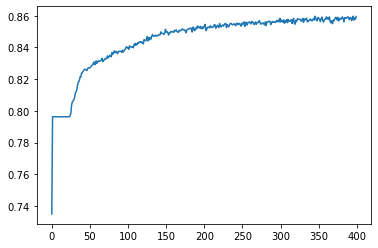

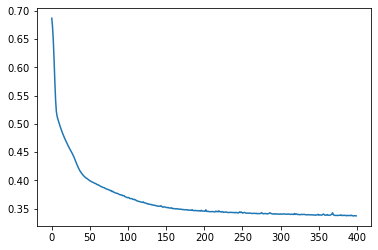

In [358]:
#model with second hidden layer

# Initialize the constructor
model = Sequential()

# Add an first hidden layer 
model.add(Dense(28, activation='relu', kernel_initializer='uniform', dtype='float64'))

# second hidden layer

model.add(Dense(14, activation='relu', kernel_initializer='uniform', dtype='float64'))

# Add an output layer with one neuron and no activation specified
model.add(Dense(1, activation = 'sigmoid', dtype='float64'))

#learning rate is set to one discovered by gridsearch
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

#note: there is no validation test here
history=model.fit(X_train, y_train, epochs=400, batch_size=500, verbose=0) 


plt.plot(history.history.get('accuracy'))
#plt.plot(history.history.get('val_accuracy'))
plt.show()
plt.plot(history.history.get('loss'))
#plt.plot(history.history.get('val_loss'))
plt.show()

Final model was trained on whole training set, because no further adjustemnts will be done on it.

##  7. Predict the results using 0.5 as a threshold (10points) 

First the prediction is generated by invoking .predict function of final model.

In [359]:
y_pred=model.predict(X_test)

y_pred is an array with probability values of being one class or the other. 

In [108]:
y_pred

array([[0.0046986 ],
       [0.07740389],
       [0.04016693],
       ...,
       [0.30760593],
       [0.30899735],
       [0.27210275]])

In [360]:
#initializing class_pred array which will store all predicted classes
class_pred=[]

#loop thorugh which the class is decided based on probability array y_pred
for i in y_pred:
    
    if i[0]>0.5:
        #belongs to class 1
        class_pred.append(1)
    else:
        #belongs to class 0
        class_pred.append(0)
        
class_pred=np.array(class_pred)

In [368]:
class_pred.sum()

415

There are 415 positive classes identified by the model in test dataset. How many ot these are true positives and how many are false positives will be identified in #8.

## 8. Print the Accuracy score and confusion matrix (5 points)

For both, confucsion matrix and accuracy score, metrics from sklearn is used. 

In [369]:
metrics.confusion_matrix(y_test, class_pred)

array([[2273,  116],
       [ 312,  299]], dtype=int64)

In [363]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, class_pred).ravel()

In [364]:
(tn, fp, fn, tp)

(2273, 116, 312, 299)

In [365]:
metrics.accuracy_score(y_test, class_pred)

0.8573333333333333

As seen above from the confusion matrix, 2273 are TN, 299 are TP, 116 are FP and 312 are FN. All of the above leads to a conclusion that model is not performing particulary good. even though accuracy is above 85%.

There might be opportunity to increase specificity by changing treshold between positive and negative, however, it may lead to even greater number of false positives which may decrease precission.


In [374]:

#functions to calculate precission, recall and f_score
def my_precission(TP, FP):
    return(TP/(TP+FP))

def my_recall(TP,FN):
    return(TP/(TP+FN))

def my_f_score(TP, FP, FN):
    return(2*my_precission(TP, FP)*my_recall(TP,FN)/(my_precission(TP, FP)+my_recall(TP,FN)))

#function to assign class based on treshold
def what_class(raw_pred, treshold):
    class_pred=[]
    for i in raw_pred:
        if i[0]>treshold:
            #belongs to class 1
            class_pred.append(1)
        else:
            #belongs to class 0
            class_pred.append(0)
        
    class_pred=np.array(class_pred)
    return(class_pred)

In [375]:
y_pred_train=model.predict(X_train)

In [376]:
#tresholds to be tested
tresholds=[0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [380]:
#checking f_score for each treshold in tresholds list
for i in tresholds:
    predicted_class=what_class(y_pred_train, i)
    tn, fp, fn, tp = metrics.confusion_matrix(y_train, predicted_class).ravel()
    f_score=my_f_score(tp, fp, fn)
    print('For treshold', i, 'f1 score on training dataset is ', f_score)

for treshold 0.1 f1 score on training dataset is  0.5071622144792877
for treshold 0.2 f1 score on training dataset is  0.5903962214641826
for treshold 0.3 f1 score on training dataset is  0.6165884194053208
for treshold 0.4 f1 score on training dataset is  0.6147186147186148
for treshold 0.5 f1 score on training dataset is  0.5897226753670474
for treshold 0.6 f1 score on training dataset is  0.5371219065077909
for treshold 0.7 f1 score on training dataset is  0.4804020100502513
for treshold 0.8 f1 score on training dataset is  0.3751387347391787
for treshold 0.9 f1 score on training dataset is  0.22456575682382135


It can be seen that on training set, best f1 score is achieved when treshold of 0.3 is applied. 

In [381]:
metrics.accuracy_score(y_train, what_class(y_pred_train, 0.3))

0.825

In [382]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, what_class(y_pred_train, 0.3)).ravel()

In [383]:
(tn, fp, fn, tp)

(4790, 784, 441, 985)

As forseen, by reducing the treshold, number of false positives significantly increased, which in turns decreased accuracy. In this particular example, it may be still usefull, since it is not so important to identify TN, but TP. In the code belod, treshold of 0.3 is applied to test dataset.

##### on test dataset

In [385]:
y_pred_test=model.predict(X_test)

In [386]:
metrics.accuracy_score(y_test, what_class(y_pred_test, 0.3))

0.8176666666666667

In [387]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, what_class(y_pred_test, 0.3)).ravel()

In [388]:
(tn, fp, fn, tp)

(2065, 324, 223, 388)

In [389]:
#recall with trehold of 0.3
my_recall(tp, fn)

0.6350245499181669

In [390]:
#recall when treshold of 0.5 was applied
my_recall(299, 312)

0.48936170212765956

As seen above, when treshold of 0.3 is applied, recall is significantly improved, however on the expense of accuracy which has droped form more then 85% to less than 82%. 